In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as stats

# Assignment 1 Question 3

### a) Simulate the following function

$$ v=a_0+a_1t+a_2\sin{a_4t}+a_3\cos{a_4t}$$

Include Gaussian errors

In [2]:
# Define the function
def fit_function(t, *params):
    return params[0] + params[1]*t + params[2]*np.sin(params[4]*t) + params[3]*np.sin(params[4]*t)

Simulate at a random number of times over an interval

In [3]:
t_start = 0
t_end = 10
v_params = [1,1,1,1,1]
npoints = np.random.randint(10, 100)
t = np.linspace(t_start, t_end, npoints)
v = fit_function(t, *v_params)
v_rand = stats.norm.rvs(size=npoints, loc=0, scale=0.2)
v += v_rand

Make initial plot

Text(0.5, 1.0, '$v(t)$ where params=[1, 1, 1, 1, 1]')

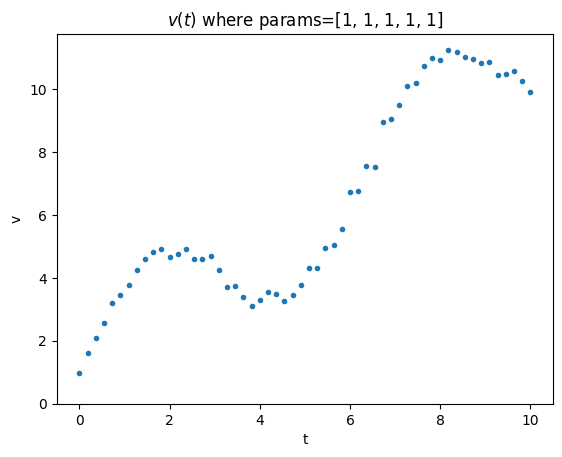

In [4]:
fig = plt.figure()
plt.plot(t, v, '.')
plt.xlabel('t')
plt.ylabel('v')
plt.ylim(0)
plt.title(f"$v(t)$ where params={v_params}")

### b) Setting a0 =0, a1 =1, a2 =1, a3 =1 and a4 =0, simulate a dataset from times t=20 to t = 35, containing 100 points with Gaussian errors with uncertainty 0.5

In [5]:
t_start = 20
t_end = 35
v_params = [0.0,1.0,1.0,1.0,0.0]
npoints = 100
t = np.linspace(t_start, t_end, npoints)
v = fit_function(t, *v_params)
v_rand = stats.norm.rvs(size=npoints, loc=0, scale=0.5)
v += v_rand

Text(0.5, 1.0, '$v(t)$ where params=[0.0, 1.0, 1.0, 1.0, 0.0]')

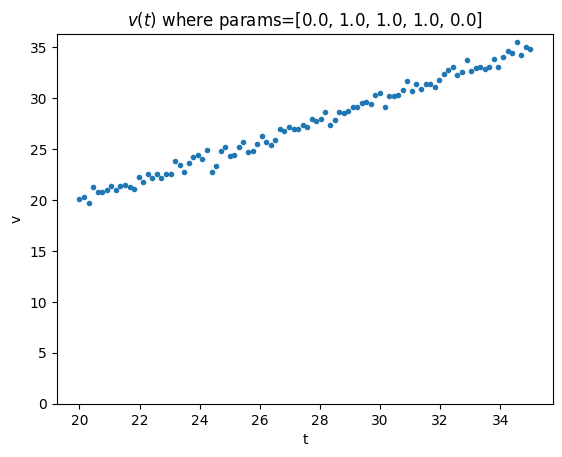

In [6]:
fig = plt.figure()
plt.plot(t, v, '.')
plt.xlabel('t')
plt.ylabel('v')
plt.ylim(0)
plt.title(f"$v(t)$ where params={v_params}")

### c) Fit the data with a function of the same form as above. Do the fit parameters agree, within error, with the expected values?

In [7]:
popt, pcov = curve_fit(fit_function, t, v, p0=v_params)

perr = []
for i in range(len(popt)):
    perr.append(float(np.sqrt(pcov[i][i])))
    print(f"p{i} = {popt[i]} +/- {perr[i]}")


p0 = -0.2069392268079982 +/- 0.908580633331152
p1 = 1.0018138903664198 +/- 268.6153633276351
p2 = 1.244587860478177 +/- 555338.051341444
p3 = 1.2648245993308973 +/- 585512.9919479968
p4 = 0.0003981216579504091 +/- 121.6087724340698


Text(0.5, 1.0, '$v(t)$ where params=[0.0, 1.0, 1.0, 1.0, 0.0]')

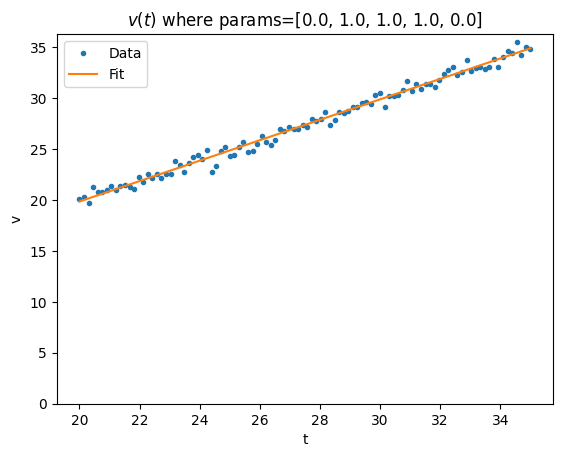

In [8]:
fig = plt.figure()
plt.plot(t, v, '.', label='Data')

yfit = fit_function(t, *popt)
plt.plot(t, yfit, '-', label="Fit")

plt.legend()
plt.xlabel('t')
plt.ylabel('v')
plt.ylim(0)
plt.title(f"$v(t)$ where params={v_params}")

This is a pretty interesting result, because it looks fine when plotted, but the parameters are all over the place. If you run the notebook again, you'll likely get a very different result that looks similar. The one I have currently agrees within error, but that error is quite a few orders of magnitude higher than it would ideally be.

My interpretation of what happened is that the parameters used to generate the data end up resulting in a linear function (since the sine/cosine terms go away). By doing a simple linear fit, this would get better results, but curve_fit wants to fit oscillations in there. 

### d) Now try fitting to

$$ v = a_0 + a_1t + a_2 \sin{(a_3t+a_4)}$$

with the same data

In [9]:
def fit_function2(t, *params):
    return params[0] + params[1]*t + params[2]*np.sin(params[3]*t + params[4])

In [10]:
popt, pcov = curve_fit(fit_function2, t, v, p0=v_params)

perr = []
for i in range(len(popt)):
    perr.append(float(np.sqrt(pcov[i][i])))
    print(f"p{i} = {popt[i]} +/- {perr[i]}")

p0 = 0.49548866388480645 +/- 2.6009247381665626
p1 = 0.9775975513740754 +/- 0.09015258450885223
p2 = -0.20536751890451407 +/- 0.3717163532376194
p3 = 0.3823540388940357 +/- 0.39774473324258136
p4 = 17.20863055455306 +/- 11.541756664157408


Text(0.5, 1.0, '$v(t)$ where params=[0.0, 1.0, 1.0, 1.0, 0.0]')

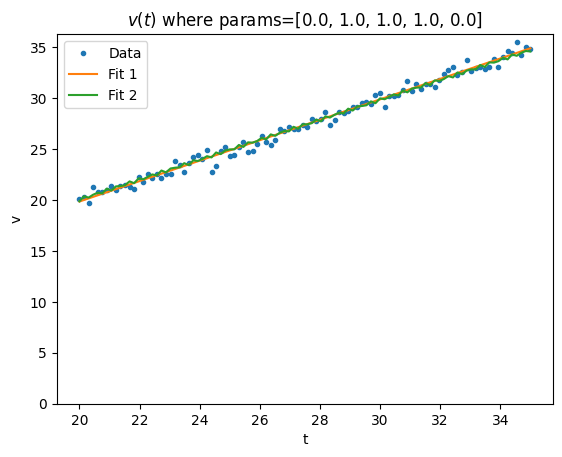

In [12]:
fig = plt.figure()
plt.plot(t, v, '.', label='Data')

yfit2 = fit_function(t, *popt)
plt.plot(t, yfit, '-', label="Fit 1")
plt.plot(t, yfit2, '-', label="Fit 2")

plt.legend()
plt.xlabel('t')
plt.ylabel('v')
plt.ylim(0)
plt.title(f"$v(t)$ where params={v_params}")

This fit is arguably worse, since it has a more prominent sine term. The original data is linear, so curve fit was tricked by the sine term in the fit function. It also seems to be trying to take the intercept and add it as a phase term (a4), which isn't entirely wrong, but not ideal.